In [3]:
import setup; import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from speech_pause_indicator import speech as original_speech

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



[5000]


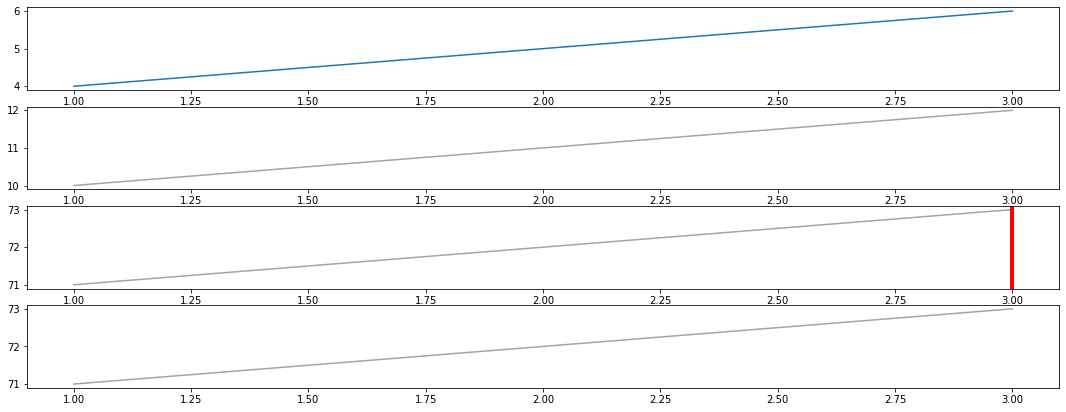

In [4]:
# Plot the rolling average and speech indicator function for the first sample
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1); fig.set_size_inches(18.5, 7)         
ax1.plot([1, 2, 3], [4, 5, 6])
time1 = np.linspace(1, 3, num = 3)

# assume length is 5000
len1 = 5000

a = [10, 11, 12]
b = [71, 72, 73]

ax2.plot(time1, a, color = '#A4A4A4')
ax3.plot(time1, b, color = '#A4A4A4');
ax4.plot(time1, b, color = '#A4A4A4');
    
# plot vertical lines for common segmentation
common_seg = [[5000, 2]]
to_plot = [i[0] for i in common_seg]
print(to_plot)
for k in range(len(to_plot)):
    if k % 2 == 0:
        c = 'red'
    else:
        c = 'green'    
    ax3.axvline(to_plot[k]/len1*(time1[-1]-time1[0])+ time1[0], color = c, ymin=0, ymax=50, linewidth=4)    

In [5]:
time1 = np.linspace(time1[0], time1[-1], num = 3)
print(time1)

[1. 2. 3.]


# multidimentional dtw

[[-1 -1  0  0 -1 -1]
 [ 1  1  0  0  1  1]
 [ 3  3  0  0  3  3]]
[[-1 -1  0  0 -1 -1]
 [ 1  1  0  0  1  1]
 [ 2  2  0  0  2  2]]
distance:  7.0


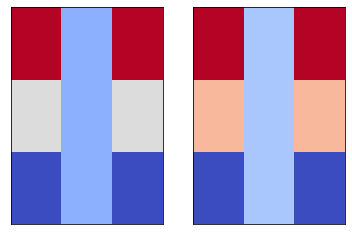

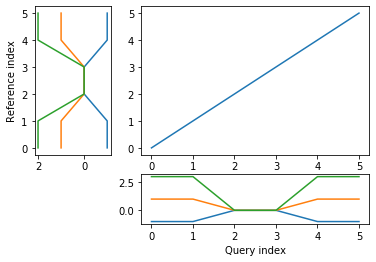

In [38]:
from dtw import dtw ; import librosa.display ; import librosa
mfcc1 = np.array([[-1, -1, 0, 0, -1, -1],[1, 1, 0, 0, 1, 1], [3, 3, 0, 0, 3, 3]])
mfcc2 = np.array([[-1, -1, 0, 0, -1, -1],[1, 1, 0, 0, 1, 1], [2, 2, 0, 0, 2, 2]])

print(mfcc1)
print(mfcc2)
alignment = dtw(mfcc1.T, mfcc2.T, keep_internals=True)
path = [alignment.index1, alignment.index2]
print('distance: ', alignment.distance) 

plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc2)

alignment.plot("threeway")

[[-1 -1  0  0 -1 -1]
 [ 1  1  0  0  1  1]
 [ 3  3  0  0  3  3]]
[[-1 -1  0  0 -1 -1]
 [ 1  1  0  0  1  1]
 [ 2  0  2  0  2  0]]
distance:  12.732050807568877


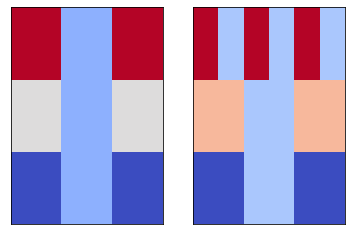

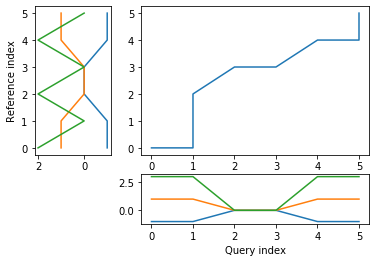

In [39]:
from dtw import dtw ; import librosa.display ; import librosa
mfcc1 = np.array([[-1, -1, 0, 0, -1, -1],[1, 1, 0, 0, 1, 1], [3, 3, 0, 0, 3, 3]])
mfcc2 = np.array([[-1, -1, 0, 0, -1, -1],[1, 1, 0, 0, 1, 1], [2, 0, 2, 0, 2, 0]])

print(mfcc1)
print(mfcc2)
alignment = dtw(mfcc1.T, mfcc2.T, keep_internals=True)
path = [alignment.index1, alignment.index2]
print('distance: ', alignment.distance) 

plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc2)

alignment.plot("threeway")

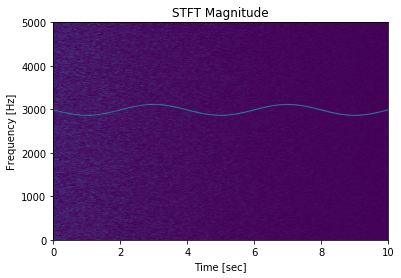

In [31]:
from scipy import signal

# fs = 10e3
# N = 1e5
# amp = 2 * np.sqrt(2)
# noise_power = 0.01 * fs / 2
# time = np.arange(N) / float(fs)
# mod = 500*np.cos(2*np.pi*0.25*time)
# carrier = amp * np.sin(2*np.pi*3e3*time + mod)
# noise = np.random.normal(scale=np.sqrt(noise_power),
#                          size=time.shape)
# noise *= np.exp(-time/5)
# x = carrier + noise

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)

f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()